In [1]:
import pandas as pd
import numpy as np

In [19]:
import scipy.stats as stats

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Import data
filename='./turnstile_data_master_with_weather.csv'

turnstile_weather=pd.read_csv(filename)

In [5]:
# view df
turnstile_weather.head()

,Unnamed: 0,UNIT,DATEn,TIMEn,Hour,DESCn,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,...,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
0,0,R001,2011-05-01,01:00:00,1,REGULAR,0.0,0.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
1,1,R001,2011-05-01,05:00:00,5,REGULAR,217.0,553.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
2,2,R001,2011-05-01,09:00:00,9,REGULAR,890.0,1262.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
3,3,R001,2011-05-01,13:00:00,13,REGULAR,2451.0,3708.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0
4,4,R001,2011-05-01,17:00:00,17,REGULAR,4400.0,2501.0,30.31,42.0,...,39.0,30.27,0.0,0.0,5.0,50.0,60.0,69.0,0.0,0.0


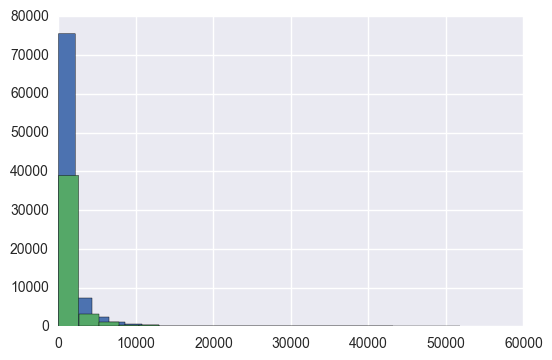

In [18]:
# plot histogram
plt.hist(turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==0],bins=20) 
plt.hist(turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==1],bins=20);

In [16]:
with_rain_mean=turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==0].mean()
without_rain_mean=turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==1].mean()

In [22]:
U,p=stats.mannwhitneyu(turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==0],
                      turnstile_weather['ENTRIESn_hourly'][turnstile_weather['rain']==1])

U,p

(1924409167.0, 0.024940392294493356)

In [24]:
turnstile_weather.corr()

,Unnamed: 0,Hour,ENTRIESn_hourly,EXITSn_hourly,maxpressurei,maxdewpti,mindewpti,minpressurei,meandewpti,meanpressurei,fog,rain,meanwindspdi,mintempi,meantempi,maxtempi,precipi,thunder
Unnamed: 0,1.000000,0.003553,-0.030435,-0.026746,-0.156945,0.845473,0.862078,-0.172088,0.860351,-0.147169,0.224441,0.229469,-0.255451,0.844228,0.699812,0.504806,0.063048,NaN
Hour,0.003553,1.000000,0.175430,0.159397,0.001386,-0.000465,-0.000107,0.000612,-0.000244,0.000745,-0.000602,-0.001285,-0.001239,0.000097,-0.000369,-0.000760,-0.002225,NaN
ENTRIESn_hourly,-0.030435,0.175430,1.000000,0.744316,-0.017084,-0.009893,-0.020135,-0.020517,-0.016198,-0.016128,0.011368,0.003062,0.026627,-0.029034,-0.022796,-0.014303,0.009665,NaN
EXITSn_hourly,-0.026746,0.159397,0.744316,1.000000,-0.016595,-0.008146,-0.017114,-0.018732,-0.013743,-0.015310,0.009290,0.002551,0.022732,-0.025004,-0.019477,-0.012029,0.008957,NaN
maxpressurei,-0.156945,0.001386,-0.017084,-0.016595,1.000000,-0.201598,-0.104907,0.903279,-0.139980,0.963418,-0.263019,-0.166759,-0.062377,-0.170089,-0.120336,-0.054731,-0.180046,NaN
maxdewpti,0.845473,-0.000465,-0.009893,-0.008146,-0.201598,1.000000,0.941752,-0.275805,0.977767,-0.220460,0.374763,0.399360,-0.253309,0.810349,0.663332,0.471552,0.189278,NaN
mindewpti,0.862078,-0.000107,-0.020135,-0.017114,-0.104907,0.941752,1.000000,-0.140641,0.986370,-0.109526,0.282484,0.345576,-0.263271,0.815898,0.639306,0.421012,0.178673,NaN
minpressurei,-0.172088,0.000612,-0.020517,-0.018732,0.903279,-0.275805,-0.140641,1.000000,-0.202639,0.960535,-0.412027,-0.217414,-0.086627,-0.148497,-0.068469,0.013474,-0.113731,NaN
meandewpti,0.860351,-0.000244,-0.016198,-0.013743,-0.139980,0.977767,0.986370,-0.202639,1.000000,-0.157290,0.346332,0.390681,-0.256636,0.810766,0.635267,0.420145,0.196789,NaN
meanpressurei,-0.147169,0.000745,-0.016128,-0.015310,0.963418,-0.220460,-0.109526,0.960535,-0.157290,1.000000,-0.299548,-0.250252,-0.110839,-0.111421,-0.044165,0.025621,-0.170345,NaN


In [25]:
def normalize_features(df):
    """
    Normalize the features in the data set.
    """
    mu = df.mean()
    sigma = df.std()
    
    if (sigma == 0).any():
        raise Exception("One or more features had the same value for all samples, and thus could " + \
                         "not be normalized. Please do not include features with only a single value " + \
                         "in your model.")
    df_normalized = (df - df.mean()) / df.std()

    return df_normalized, mu, sigma

In [26]:
normalize_features(turnstile_weather)

Exception: One or more features had the same value for all samples, and thus could not be normalized. Please do not include features with only a single value in your model.